In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('SAM_Results_v2.csv')
data = data[data.prim_purpose!='Tailings'][['nid_area','nhd_area']]
missing = data[data.nid_area == data.nhd_area]
data = data[data.nid_area != data.nhd_area]

In [7]:
data.head()

,nid_area,nhd_area
0,14.0,4.942100
1,5.0,8.653632
2,173.0,171.490870
3,12.0,12.108145
4,178.0,177.915600


In [8]:
np.sum(data.nid_area), np.sum(data.nhd_area)

(5358435.817999994, 2573343.678969654)

In [9]:
np.mean((data.nhd_area - data.nid_area)/data.nid_area), np.median((data.nhd_area - data.nid_area)/data.nid_area)

(2.1882934373702985, -0.21375681818181833)

In [10]:
np.mean(data.nid_area), np.sum(data.nid_area)

(281.9339060296745, 5358435.817999994)

In [11]:
( np.sum(data.nhd_area) / np.sum(data.nid_area) )

0.4802415791424259

In [12]:
100 * np.mean(missing.nhd_area) / np.mean(data.nhd_area) # missing NID waterbodies are 8% on average (Percentage)

8.188447501585996

Estimate

In [13]:
75*1 + 25*0.08

77.0

Estimate Actual

In [16]:
75*1 + 25*(0.08/0.4802)

79.1649312786339

Find Error

In [17]:
100*(77-79.165)/79.165

-2.7347944167245704

In [18]:
4.15/77*100 # Percentage of Surface Area

5.38961038961039

In [19]:
np.sum(missing.nhd_area) / ( np.sum(data.nhd_area) + np.sum(missing.nhd_area) )

0.025869649739574407

In [21]:
diff = data.nhd_area - data.nid_area
diff_perc = 100 * (diff) / data.nid_area

/Users/rspencer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


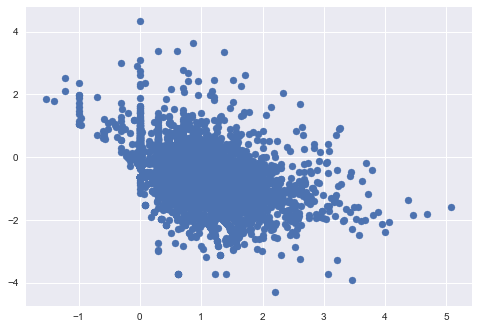

In [65]:
plt.scatter(np.log10(data.nid_area), np.log10(diff_perc))
plt.show()

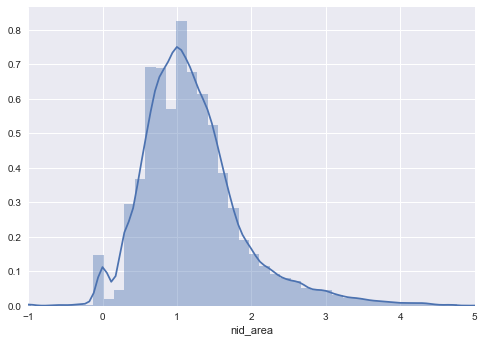

In [73]:
sns.distplot(np.log10(data.nid_area))
plt.xlim([-1,5])
plt.show()

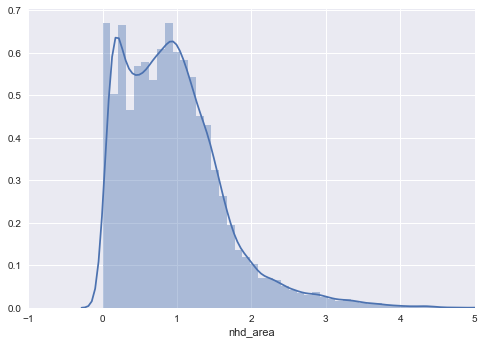

In [74]:
sns.distplot(np.log10(data.nhd_area))
plt.xlim([-1,5])
plt.show()

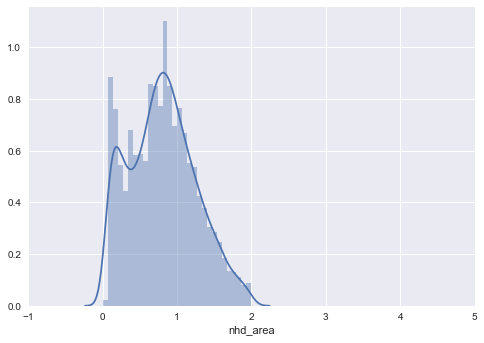

In [75]:
sns.distplot(np.log10(missing.nhd_area))
plt.xlim([-1,5])
plt.show()

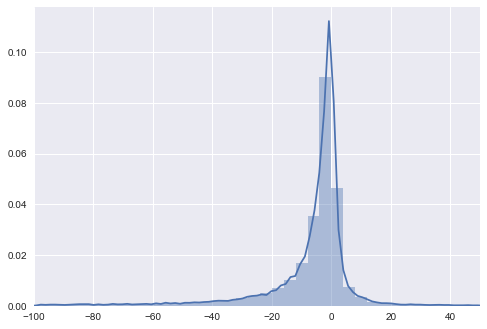

In [92]:
sns.distplot(diff[ (diff>-100) & (diff<100) ])
plt.xlim([-100,50])
plt.show()

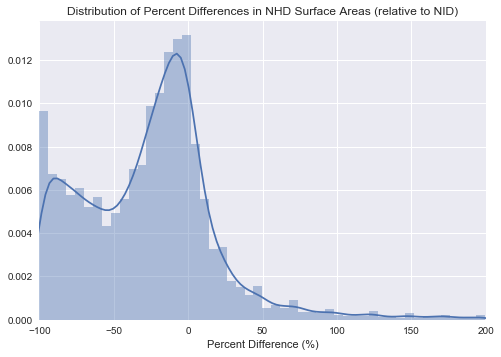

In [107]:
sns.distplot(diff_perc[ (diff_perc<200) ])
plt.title('Distribution of Percent Differences in NHD Surface Areas (relative to NID)')
plt.xlabel('Percent Difference (%)')
plt.xlim([-100,200])
plt.show()